<a href="https://colab.research.google.com/github/arashsajjadi/Recognition-of-English-digits/blob/main/Copy_of_DSA_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import warnings
warnings.simplefilter('ignore')

In [ ]:
initial_trian=pd.read_csv('Data science algorithms.csv')
initial_trian = shuffle(initial_trian)

In [ ]:
X_train=initial_trian.iloc[:,1:].values
Y_train = initial_trian.iloc[:,0].values
X_train=np.mod((np.abs(-1*(X_train<49)))+1,2)

In [ ]:
def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(label)

def imshowing(i):
  tmp=(initial_trian.iloc[i,1:].to_numpy()).reshape((28,28))
  tmp2=X_train[i,:].reshape((28,28))*255
  tmp3=np.zeros((28,2*28))
  tmp3[:,:28]=tmp
  tmp3[:,28:]=tmp2
  plt.imshow(tmp3,cmap='gray')
  plt.show()

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/25+1
    n_cols=25
    plt.figure(figsize=(n_cols * 1, n_rows * 1.5))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])
        
def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
        plot_ds(X_train[indices][:25], title, y[indices])
        
def clusters_stats(predict, y):
    stats = np.zeros((10,3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster)
    return stats



def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)
    
def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n


n=60000
n_digits=10
X = X_train[0:n,:]
Y = Y_train[0:n]
inputs = X[:n,:]

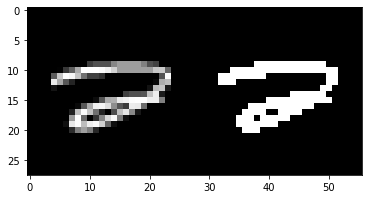

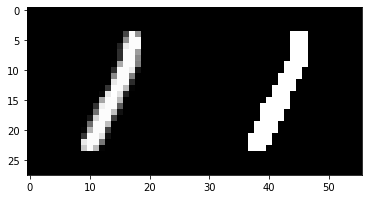

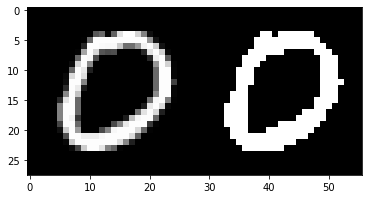

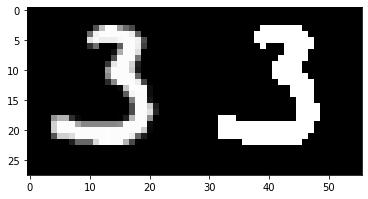

In [ ]:
for i in range(4):
  imshowing(i)


Plotting an extract of the 10 clusters, overall purity: 0.612983


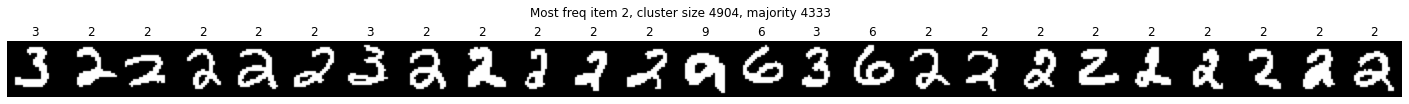

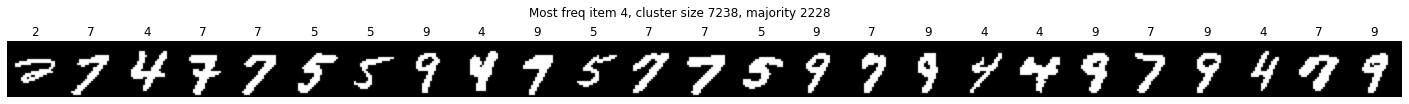

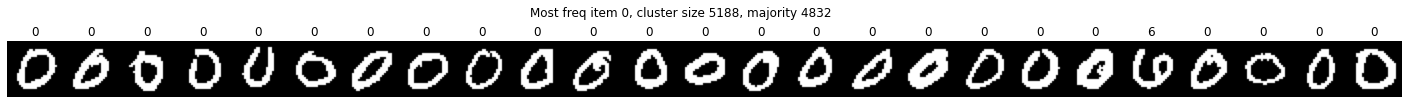

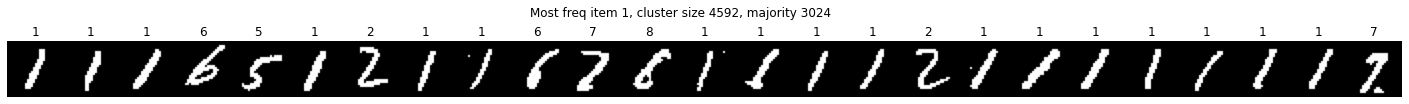

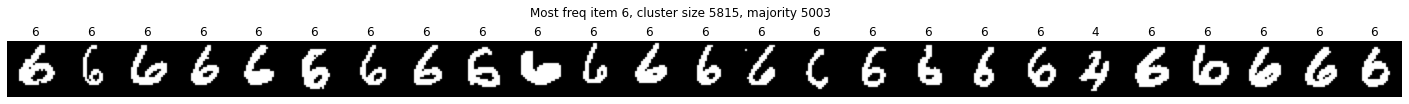

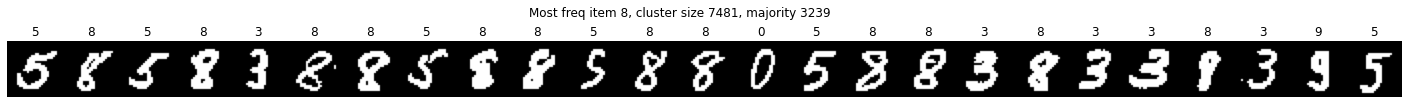

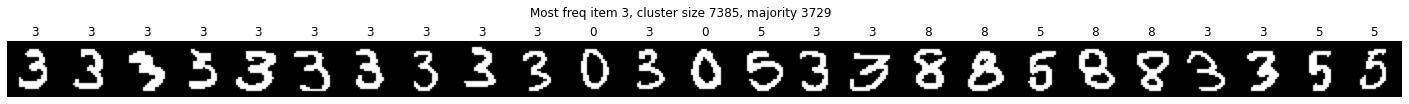

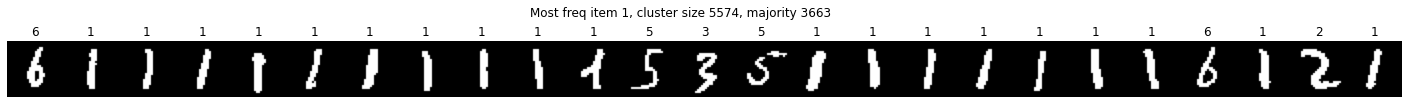

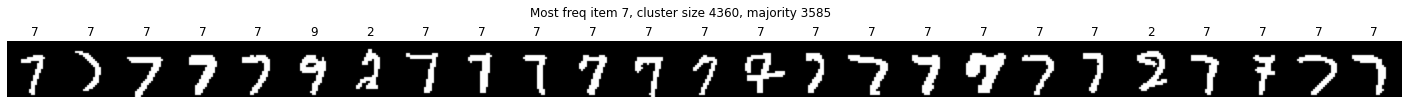

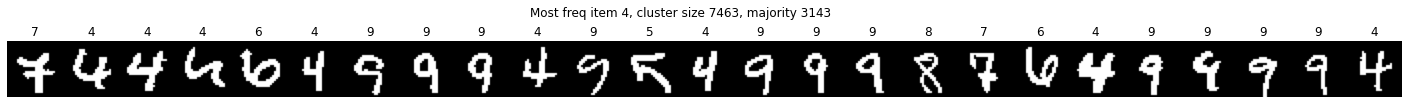

In [ ]:
a=0
while(a<0.6):
    pca = PCA(n_components=50) 
    kmeans = KMeans(n_clusters=n_digits,n_init=1,random_state=1)
    predictor = Pipeline([('pca', pca), ('kmeans', kmeans)])
    predict = predictor.fit(inputs).predict(inputs)

    stats = clusters_stats(predict, Y)
    purity = clusters_purity(stats)
    a=purity

print("Plotting an extract of the 10 clusters, overall purity: %f" % purity)

plot_clusters(predict, Y, stats)

75.24215371467119 % of the data variance was maintained.
Plotting an extract of the 10 clusters, overall purity: 0.650817


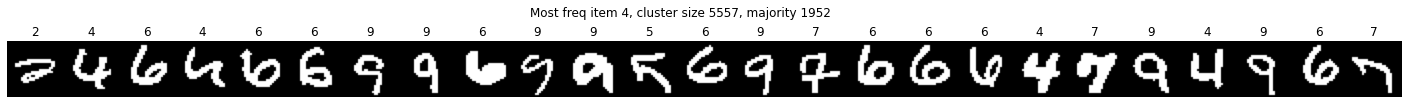

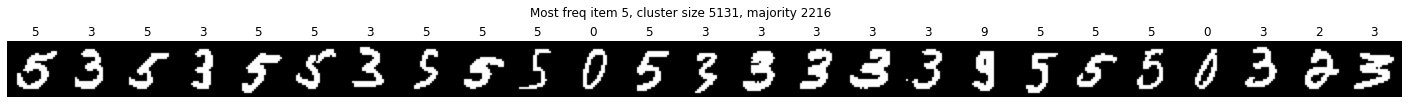

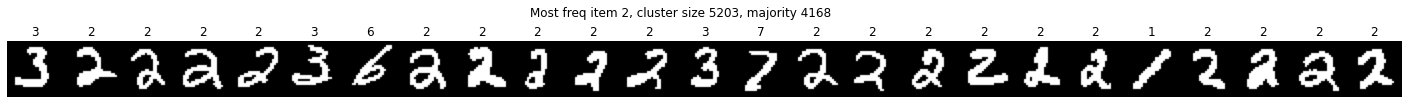

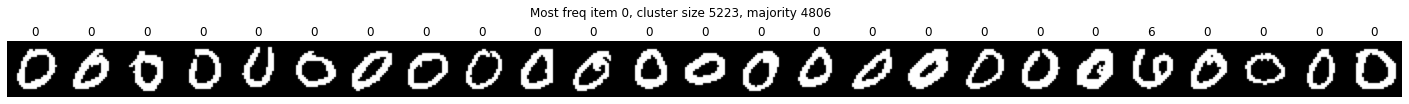

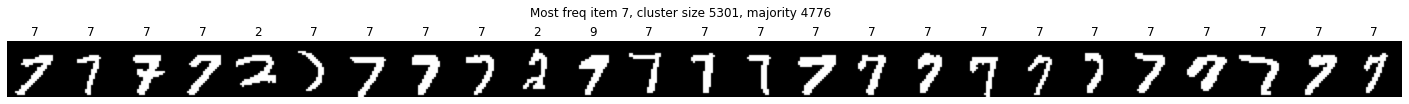

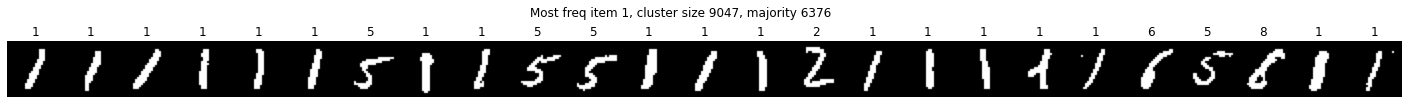

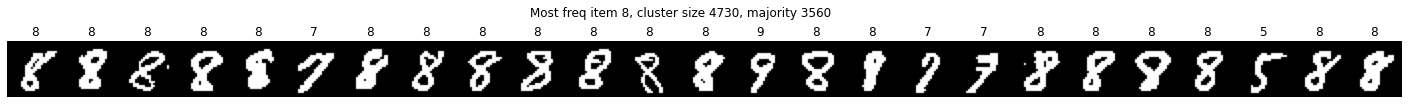

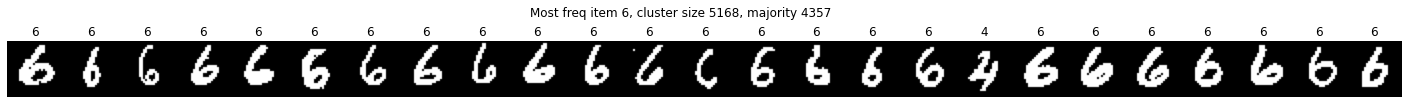

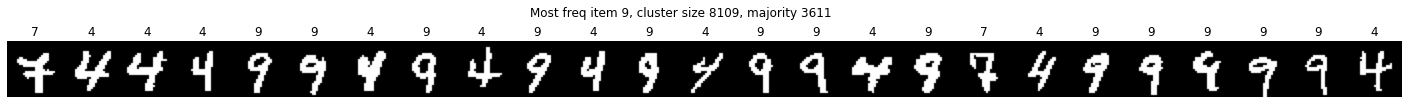

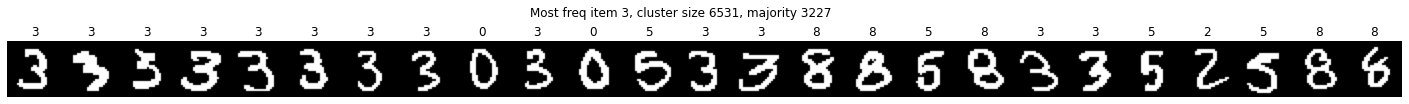

In [ ]:
pca = PCA(n_components=50)
X_p=pca.fit_transform(X)
print(np.sum(pca.explained_variance_ratio_)*100,"% of the data variance was maintained.")
X_p=pd.DataFrame(data=X_p)
a=0
while(a<0.63):
  model = MiniBatchKMeans(n_clusters=10)
  pred=model.fit(X_p)
  yhat = model.predict(X_p)
  clusters = np.unique(yhat)
  stats = clusters_stats(yhat, Y)
  purity = clusters_purity(stats)
  a=purity
print("Plotting an extract of the 10 clusters, overall purity: %f" % purity)
plot_clusters(yhat, Y, stats)